# Titanic: Machine Learning from Disaster

* Description:
    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
* Problem definition: In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
print ("Dimension of train data {}".format(train.shape))
print ("Dimension of test data {}".format(test.shape))

Dimension of train data (891, 12)
Dimension of test data (418, 11)


In [4]:
print ("Basic statistical description:")
train.describe()

Basic statistical description:


/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Comparison between test and train data

#### From following cells, we could know that train and test data are split by PassengerId.

In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Let's look at data graphically. We could see that all the distribution of features are similar.

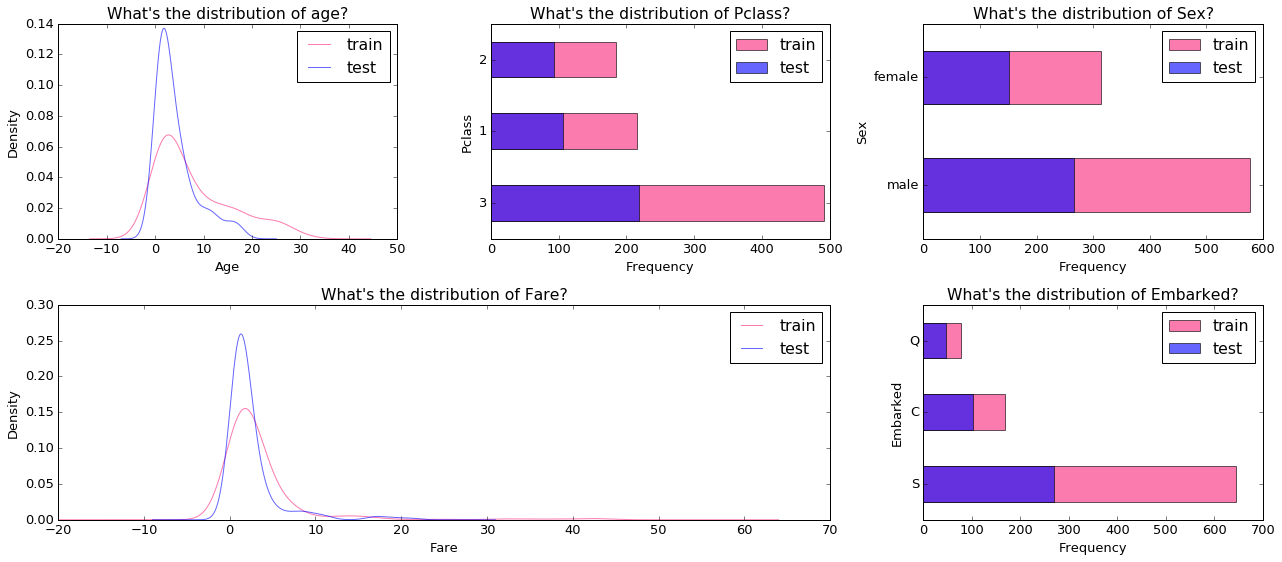

In [7]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
train.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Age.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Pclass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
train.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

#### We could know that the numbers of survived and died people are close to balanced.

In [8]:
print (train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


### Look closely to the train data

#### We could see that the density of survived is higher than not survived under age 10.

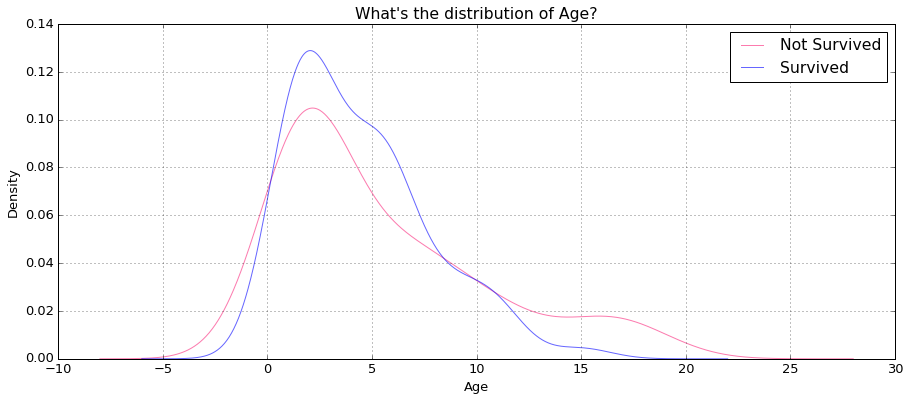

In [9]:
fig = plt.figure(figsize=(15, 6))

train[train.Survived==0].Age.value_counts().plot(kind='density', color='#FA2379', label='Not Survived', alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind='density', label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

#### We could observe that the survived rate of female is higher than male about 50%

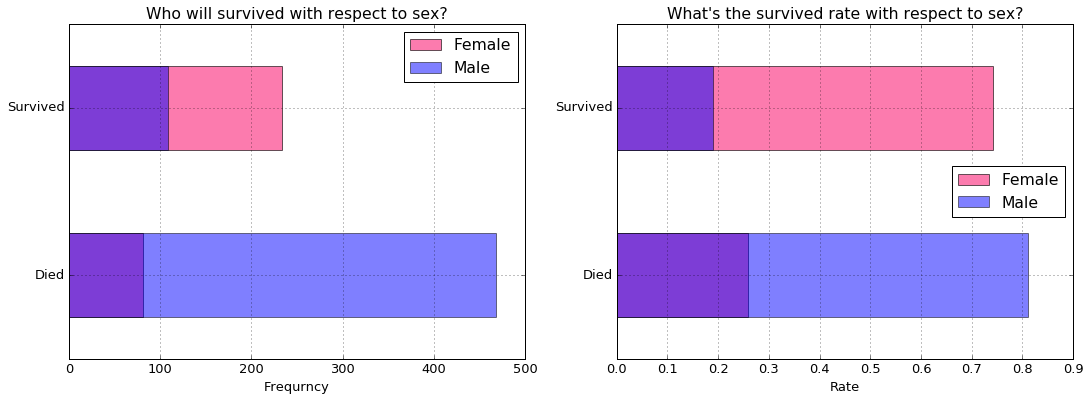

In [10]:
df_male = train[train.Sex=='male'].Survived.value_counts().sort_index()
df_female = train[train.Sex=='female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
df_male.plot(kind='barh', label='Male', alpha=alpha-0.1)
ax1.set_xlabel('Frequrncy')
ax1.set_yticklabels(['Died', 'Survived'])
ax1.set_title("Who will survived with respect to sex?" )
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2), (0,1))
(df_female/train[train.Sex=='female'].shape[0]).plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
(df_male/train[train.Sex=='male'].shape[0]).plot(kind='barh', label='Male', alpha=alpha-0.1)
ax2.set_xlabel('Rate')
ax2.set_yticklabels(['Died', 'Survived'])
ax2.set_title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()

#### We could observed that the class of people affected the posibility of being survived.

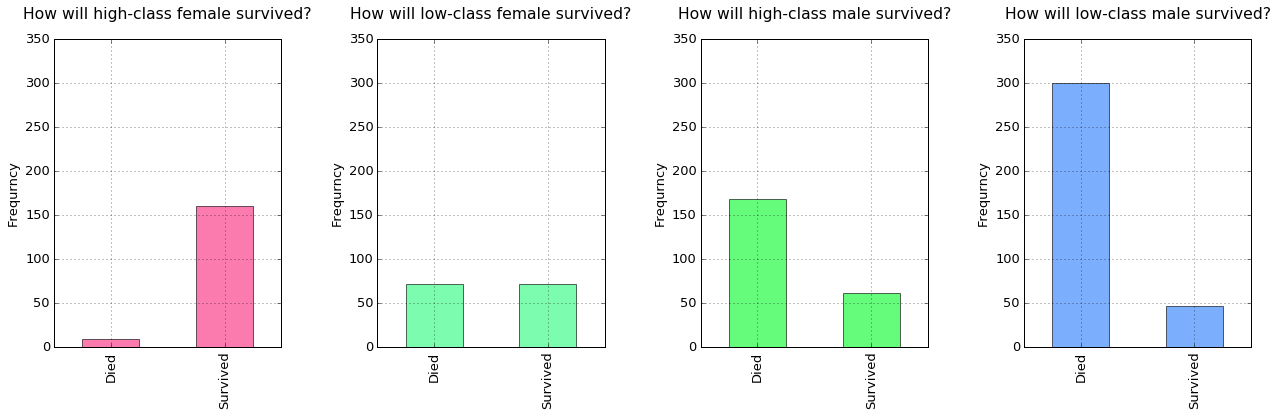

In [11]:
df_male = train[train.Sex=='male']
df_female = train[train.Sex=='female']
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,4), (0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#FA2379', alpha=alpha)
ax1.set_ylabel('Frequrncy')
ax1.set_ylim((0,350))
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("How will high-class female survived?", y=1.05)
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequrncy')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequrncy')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequrncy')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

#### We could see that if the value of Ticket is the same, passenger would be close, like friends or familes. But sometimes it will not be the case, so we need to carefully handle it.

In [12]:
train[train.Ticket=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [13]:
train[train.Ticket=='CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


## Data Cleaning

#### Let's see how many missing values we have on each column. 

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Thanks for [this amazing sharing](https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic/notebook), now we have a good way to replace missing values with sensible values. Let's assume the embarked is related with fare and pclass.

### Missing values on Embarked

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


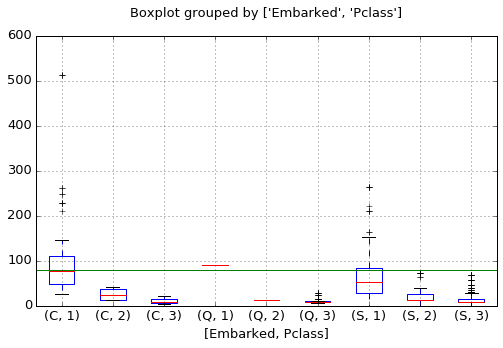

In [16]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = train.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
ax.set_title('', y=1.1)

train[train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

#### From the above boxplot, we should replace NA with C because most people who had Pclass 1 and Fare 80 would be Embarked C

In [17]:
_ = train.set_value(train.Embarked.isnull(), 'Embarked', 'C')

### Missing values on Fare

#### By fixing the values of Embarked and Pclass, we could plot histogram of Fare. And we should use the most common value to replace the NA value of Fare.

,Pclass,Fare,Embarked
152,3,NaN,S


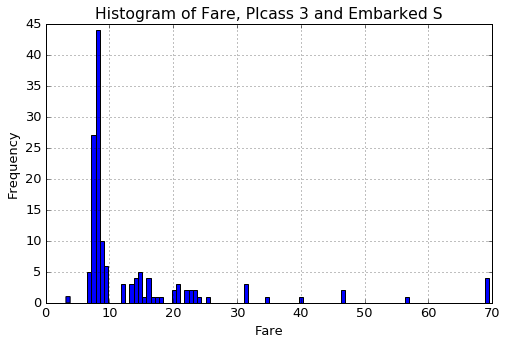

In [18]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.hist(bins=100, ax=ax)
test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')

test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [19]:
print ("The top 5 most common value of Fare")
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()

The top 5 most common value of Fare


8.0500    17
7.8958    10
7.7750    10
7.8542     8
8.6625     8
Name: Fare, dtype: int64

In [20]:
_ = test.set_value(test.Fare.isnull(), 'Fare', 8.05)

#### Replace the missing value of Cabin with U0

In [21]:
full = pd.concat([train, test], ignore_index=True)
_ = full.set_value(full.Cabin.isnull(), 'Cabin', 'U0')

## Feature Engineering

#### Create a feature, Names, to store the length of words in name.

In [22]:
import re
names = full.Name.map(lambda x: len(re.split(' ', x)))
_ = full.set_value(full.index, 'Names', names)
del names

#### Create a feature, Title.

In [23]:
title = full.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
title[title=='Mme'] = 'Mrs'
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
_ = full.set_value(full.index, 'Title', title)
del title

#### Create a feature, Deck. It may represents the socioeconomic status.

In [24]:
deck = full[~full.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
deck = pd.factorize(deck)[0]
_ = full.set_value(full.index, 'Deck', deck)
del deck

#### Create a feature, Room. It may represents the geo lacation.

In [25]:
checker = re.compile("([0-9]+)")
def roomNum(x):
    nums = checker.search(x)
    if nums:
        return int(nums.group())+1
    else:
        return 1
rooms = full.Cabin.map(roomNum)
_ = full.set_value(full.index, 'Room', rooms)
del checker, roomNum
full['Room'] = full.Room/full.Room.sum()

#### Create a feature, Group_num. It may represents the size of family.

In [26]:
full['Group_num'] = full.Parch + full.SibSp + 1

#### Create a feature, Group_size. When the size is between 2 and 4, more people are survived.

In [27]:
full['Group_size'] = pd.Series('M', index=full.index)
_ = full.set_value(full.Group_num>4, 'Group_size', 'L')
_ = full.set_value(full.Group_num==1, 'Group_size', 'S')

#### Normalized the fare.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full['NorFare'] = pd.Series(scaler.fit_transform(full.Fare.reshape(-1,1)).reshape(-1), index=full.index)

In [29]:
def setValue(col):
    _ = train.set_value(train.index, col, full[:891][col].values)
    _ = test.set_value(test.index, col, full[891:][col].values)

for col in ['Deck', 'Room', 'Group_size', 'Group_num', 'Names', 'Title']:
    setValue(col)

#### Predict Age

In [30]:
full.drop(labels=['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket', 'Fare'], axis=1, inplace=True)
full = pd.get_dummies(full, columns=['Embarked', 'Sex', 'Title', 'Group_size'])

In [31]:
from sklearn.model_selection import train_test_split
X = full[~full.Age.isnull()].drop('Age', axis=1)
y = full[~full.Age.isnull()].Age
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [33]:
import xgboost as xgb

XGB = xgb.XGBRegressor(max_depth=4, seed= 42)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
parameters = {'reg_alpha':np.linspace(0.1,1.0,5), 'reg_lambda': np.linspace(1.0,3.0,5)}
reg_xgb = get_model(XGB, parameters, X_train, y_train, scoring)
print (reg_xgb)

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0.55000000000000004,
       reg_lambda=3.0, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)


In [34]:
print ("Mean absolute error of test data: {}".format(mean_absolute_error(y_test, reg_xgb.predict(X_test))))

Mean absolute error of test data: 7.728310931438709


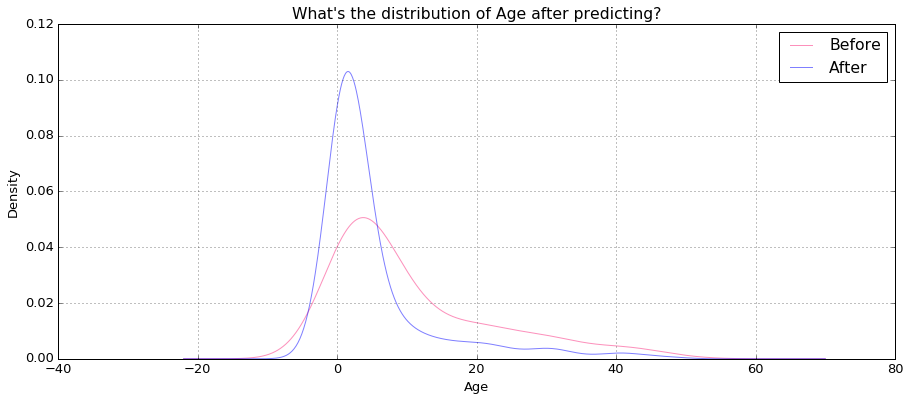

In [35]:
fig = plt.figure(figsize=(15, 6))
alpha = 0.5
full.Age.value_counts().plot(kind='density', color='#FA2379', label='Before', alpha=alpha)

pred = reg_xgb.predict(full[full.Age.isnull()].drop('Age', axis=1))
full.set_value(full.Age.isnull(), 'Age', pred)

full.Age.value_counts().plot(kind='density', label='After', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age after predicting?" )
plt.legend(loc='best')
plt.grid()

In [36]:
full['NorAge'] = pd.Series(scaler.fit_transform(full.Age.reshape(-1,1)).reshape(-1), index=full.index)
full['NorNames'] = pd.Series(scaler.fit_transform(full.Names.reshape(-1,1)).reshape(-1), index=full.index)
full['Group_num'] = pd.Series(scaler.fit_transform(full.Group_num.reshape(-1,1)).reshape(-1), index=full.index)

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [37]:
for col in ['NorAge', 'NorFare', 'NorNames', 'Group_num']:
    setValue(col)

#### Encoding sex, feamle: 0 and male: 1

In [38]:
train.Sex = np.where(train.Sex=='female', 0, 1)
test.Sex = np.where(test.Sex=='female', 0, 1)

#### Convert values of Embarked and Ticket into dummy variables

In [39]:
train.drop(labels=['PassengerId', 'Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
test.drop(labels=['Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)

In [40]:
train = pd.get_dummies(train, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test = pd.get_dummies(test, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test['Title_Sir'] = pd.Series(0, index=test.index)

## Build Model

In [41]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [42]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(estimator, X, y, title):
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(title))
    plt.legend(loc="lower right")
    plt.show()

In [43]:
X = train.drop(['Survived'], axis=1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score
scoring = make_scorer(accuracy_score, greater_is_better=True)

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights='uniform')
parameters = {'n_neighbors':[3,4,5], 'p':[1,2]}
clf_knn = get_model(KNN, parameters, X_train, y_train, scoring)

0.816143497758
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')


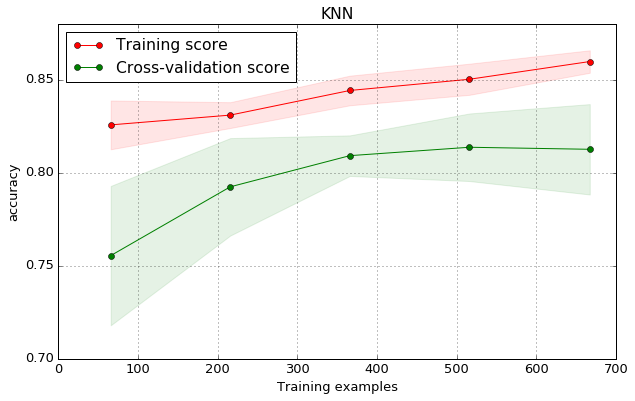

In [46]:
print (accuracy_score(y_test, clf_knn.predict(X_test)))
print (clf_knn)
plot_learning_curve(clf_knn, 'KNN', X, y, cv=4);

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc1 = get_model(rfc, parameters, X_train, y_train, scoring)

0.829596412556
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


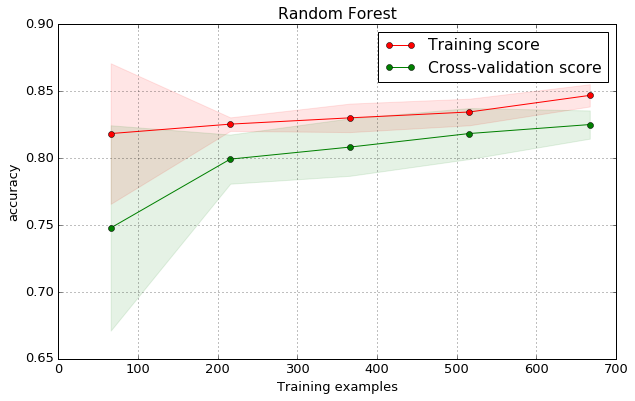

In [48]:
print (accuracy_score(y_test, clf_rfc1.predict(X_test)))
print (clf_rfc1)
plot_learning_curve(clf_rfc1, 'Random Forest', X, y, cv=4);

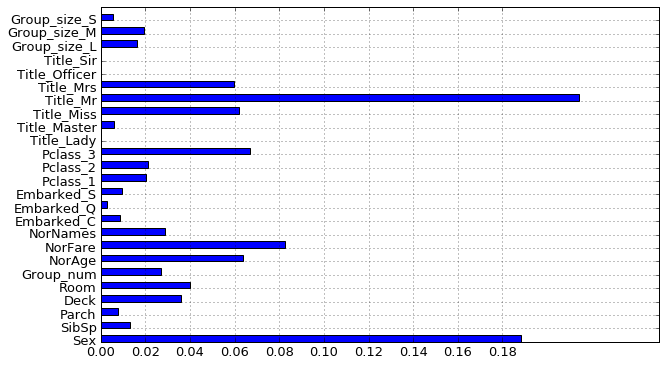

In [49]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(X_train.columns.shape[0]), clf_rfc1.feature_importances_, 0.5)
plt.yticks(np.arange(X_train.columns.shape[0]), X_train.columns)
plt.grid()
plt.xticks(np.arange(0,0.2,0.02));

In [50]:
cols = X_train.columns[clf_rfc1.feature_importances_>=0.016]

In [51]:
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc2 = get_model(rfc, parameters, X_train[cols], y_train, scoring)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)
0.834080717489


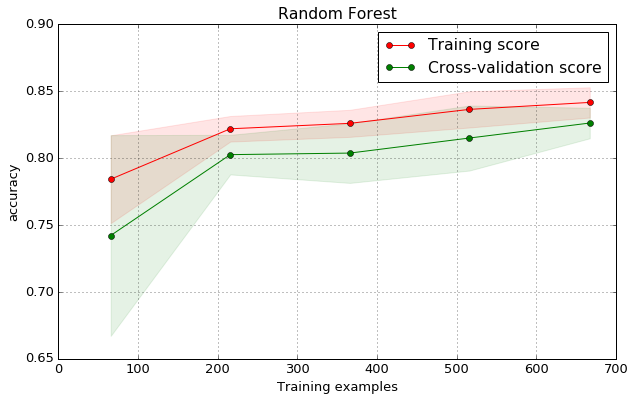

In [52]:
print (clf_rfc2)
print (accuracy_score(y_test, clf_rfc2.predict(X_test[cols])))
plot_learning_curve(clf_rfc2, 'Random Forest', X[cols], y, cv=4);

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}
clf_lg1 = get_model(lg, parameters, X_train, y_train, scoring)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.811659192825


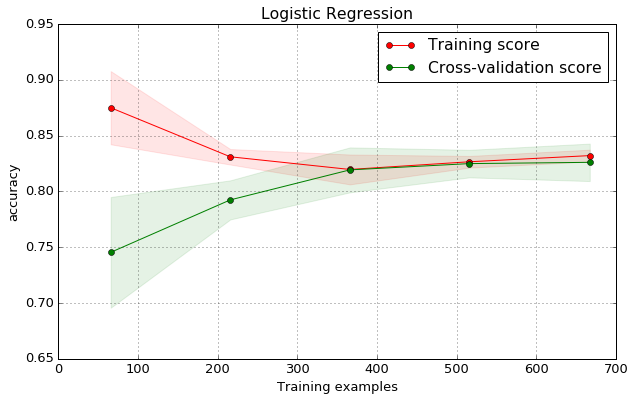

In [54]:
print (clf_lg1)
print (accuracy_score(y_test, clf_lg1.predict(X_test)))
plot_learning_curve(clf_lg1, 'Logistic Regression', X, y, cv=4);

### SVC

In [55]:
from sklearn.svm import SVC
svc = SVC(random_state=42, kernel='poly', probability=True)
parameters = {'C': [35], 'gamma': [0.0055], 'coef0': [0.1],
              'degree':[2]}
clf_svc = get_model(svc, parameters, X_train, y_train, scoring)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape=None, degree=2, gamma=0.0055, kernel='poly',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.838565022422


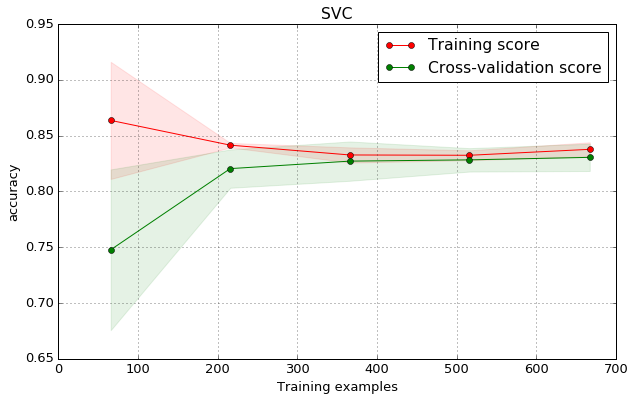

In [56]:
print (clf_svc)
print (accuracy_score(y_test, clf_svc.predict(X_test)))
plot_learning_curve(clf_svc, 'SVC', X, y, cv=4);

### XGBoost

In [57]:
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1],
              'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)

0.820627802691
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)


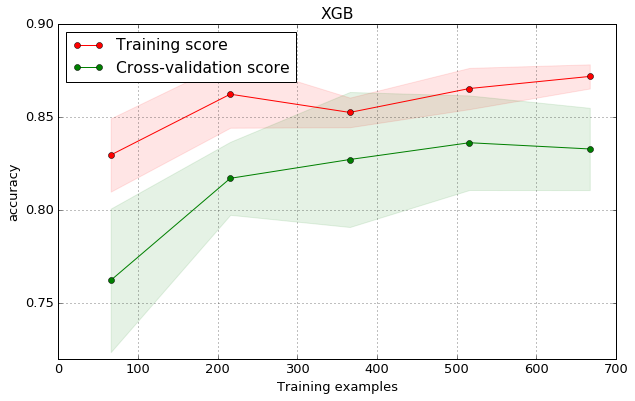

In [58]:
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)
plot_learning_curve(clf_xgb1, 'XGB', X, y, cv=4);

## Ensemble

In [59]:
from sklearn.ensemble import VotingClassifier
clf_vc = VotingClassifier(estimators=[('xgb1', clf_xgb1), ('lg1', clf_lg1), ('svc', clf_svc), 
                                      ('rfc1', clf_rfc1),('rfc2', clf_rfc2), ('knn', clf_knn)], 
                          voting='hard', weights=[4,1,1,1,1,2])
clf_vc = clf_vc.fit(X_train, y_train)

0.825112107623
VotingClassifier(estimators=[('xgb1', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
    ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform'))],
         n_jobs=1, voting='hard', weights=[4, 1, 1, 1, 1, 2])


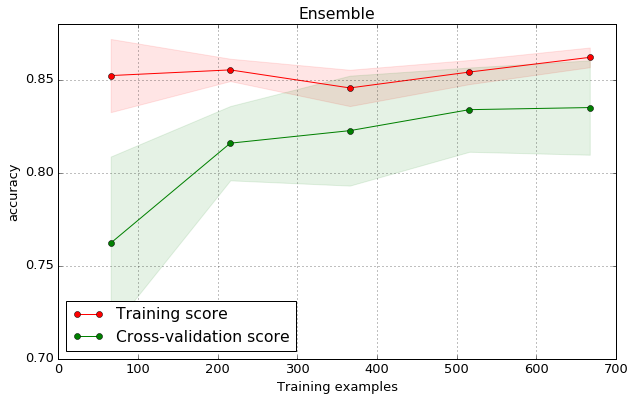

In [60]:
print (accuracy_score(y_test, clf_vc.predict(X_test)))
print (clf_vc)
plot_learning_curve(clf_vc, 'Ensemble', X, y, cv=4);

## Make submission

In [61]:
PassengerId = test.PassengerId
test.drop('PassengerId', axis=1, inplace=True)

In [62]:
def submission(model, fname, X):
    ans = pd.DataFrame(columns=['PassengerId', 'Survived'])
    ans.PassengerId = PassengerId
    ans.Survived = pd.Series(model.predict(X), index=ans.index)
    ans.to_csv(fname, index=False)